1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt?dl=1'
filename = 'data/data_000637.txt'

In [3]:
# If haven't downloaded it yet, please get the data file with wget
# !wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

# I use Windows, so no wget for me. The following lines should work fine
# on both Windows and Linux machines. However, it does not create the directory data
# if it does not exist.
import urllib.request
# moreover, the original link in the command above was downloading the html
# file of the Dropbox preview page and not the actual txt file. I had to append
# '?dl=1' to the link to have direct download access to the file
# (source for this: Dropbox documentation)

urllib.request.urlretrieve(url, filename)

('data/data_000637.txt', <http.client.HTTPMessage at 0x1e571068d10>)

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [12]:
N = 20000
dataSet = pd.read_csv(filename, sep=",", header=0, nrows=N)
headers = dataSet.columns
dataSet

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29
19996,1,0,63,3869200366,2517,6
19997,1,0,32,3869200366,2519,5
19998,1,0,17,3869200366,2522,21


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [17]:
out = dataSet.groupby('ORBIT_CNT')['BX_COUNTER'].max()
#out = dataSet['ORBIT_CNT'].value_counts()
print(out.values)
print("the mean number of BX_COUNTER entries per orbit is:", out.mean())
x = out.max()
print("and the maximum value is: ", x)


[3187 3538 2766 3377 3542 3521 3247 2989 3542 3489 3244 1370 1953 3545
 3376 3513 2310 3483 3339 3475 3011 2214 3390 3529 3481 3562 3493 2576
 3563 3516 2094 2631 3540 3426 3550 2966 3528 3436 3526 1746 3563 3384
 3489 3249 3563 3528 3510 3563 3403 3555 3084 3477 3480 2703 3186 3387
 3547 3351 3309 3558 3189 3542 2056 2750 3461 3537 3511 3451 3530 3492
 3362 3359 3148 3492 3240 3141 1741 3541 3038 3563 1081 2287 3529 3408
 3546 3458 3327 3505 3538 3256 3031 3457 3059 3376 3332 3183 3422 3067
 3484 1859 3490 3458 3550  777 2970 3511 3286 3302 2380 3555 3200 3410
 3512 3369 2644 3255 3356 3524 3531 3529 3126 3311 3474 1239 3320 3470
 3495 3424 3164 3440 3541 3404 3522 3417 3258 3463 3519 3562 3554 3266
 3514 3451 3246 3563 3562 3558 3209 3350 3468 3542 3307 3492 3243 3502
 3563 2651 3555 3281 3130 3374 3302 3168 3509 3245 3281 3544 3560 3354
 3443 1201 3425 3530 3541 3482 2891 3524 3469 3480 3317 3038 3170 3511
 3439 3160 3310 3563 3559 3374 3317 3445 3557 2929 3406 3503 3433 3425
 3460 

3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

*Hint:* introduce an offset to the absolute time such that the start of the data acquisition (i.e. the first entry) is zero.

In [19]:
def getTimeNS(orbit, bx, tdc):
    return orbit*3564*25+bx*25+tdc*25/30

# calculate the first time entry so that we start at time zero
startTime = getTimeNS(dataSet.loc[0,'ORBIT_CNT'], dataSet.loc[0,'BX_COUNTER'], dataSet.loc[0, 'TDC_MEAS'])
# startTime = 0 # remove this comment to remove the offset

# print(startTime)
dataSet['ABS_TIME'] = getTimeNS(dataSet['ORBIT_CNT'], dataSet['BX_COUNTER'], dataSet['TDC_MEAS'])-startTime
dataSet['ABS_TIME_S'] = pd.to_datetime(dataSet['ABS_TIME'])
dataSet


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME,ABS_TIME_S
0,1,0,123,3869200167,2374,26,0.000000e+00,1970-01-01 00:00:00.000000000
1,1,0,124,3869200167,2374,27,8.125000e-01,1970-01-01 00:00:00.000000000
2,1,0,63,3869200167,2553,28,4.476625e+03,1970-01-01 00:00:00.000004476
3,1,0,64,3869200167,2558,19,4.594125e+03,1970-01-01 00:00:00.000004594
4,1,0,64,3869200167,2760,25,9.649125e+03,1970-01-01 00:00:00.000009649
...,...,...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29,1.773438e+07,1970-01-01 00:00:00.017734377
19996,1,0,63,3869200366,2517,6,1.773446e+07,1970-01-01 00:00:00.017734458
19997,1,0,32,3869200366,2519,5,1.773451e+07,1970-01-01 00:00:00.017734507
19998,1,0,17,3869200366,2522,21,1.773460e+07,1970-01-01 00:00:00.017734595


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [204]:
# we want the time regarding the whole csv dataset, so we read its last row
wholeSetLen = len(pd.read_csv("data/data_000637.txt"))
lastRow = pd.read_csv(filename, sep=",", names=headers, skiprows=wholeSetLen)
# compute the absolute time of the last measurement
lastMeasurementTime = getTimeNS(lastRow['ORBIT_CNT'], lastRow['BX_COUNTER'], lastRow['TDC_MEAS'])

# and subtract the starting time of the csv file
print("the time elapsed during the data collection process is")
print(pd.Timedelta(((lastMeasurementTime) - startTime).values[0]))

the time elapsed during the data collection process is
0 days 00:00:00.980416093


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [205]:
noisyChannels = dataSet.groupby('TDC_CHANNEL').size().sort_values(ascending=False)
noisyChannels.iloc[:3]

TDC_CHANNEL
63     3
64     3
139    2
dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [206]:
orbitsCount = dataSet.groupby('ORBIT_CNT')
print(len(orbitsCount))

1


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [207]:
orbits139 = dataSet[dataSet['TDC_CHANNEL']==139]['ORBIT_CNT'].unique()
print(len(orbits139))

1


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [240]:
# dividing the data of FPGA0 and FPGA1
fpga0 = dataSet[dataSet['FPGA'] == 0]
fpga1 = dataSet[dataSet['FPGA'] == 1]

# counting the hits
print("regarding the fpga0, we have:")
print(fpga0.groupby('TDC_CHANNEL').size())
# print(type(fpga0))
print()
print("regarding the fpga1, we have:")
print(fpga1.groupby('TDC_CHANNEL').size())
# print(type(fpga1))



regarding the fpga0, we have:
TDC_CHANNEL
36     1
53     1
56     1
60     1
61     1
62     1
63     3
64     3
123    1
124    1
139    1
dtype: int64

regarding the fpga1, we have:
TDC_CHANNEL
5      1
6      1
7      1
8      1
139    1
dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

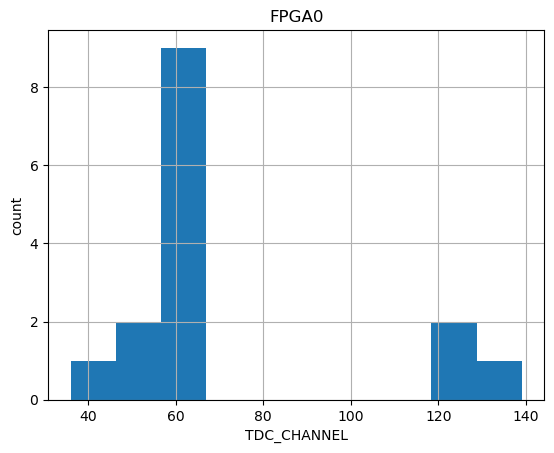

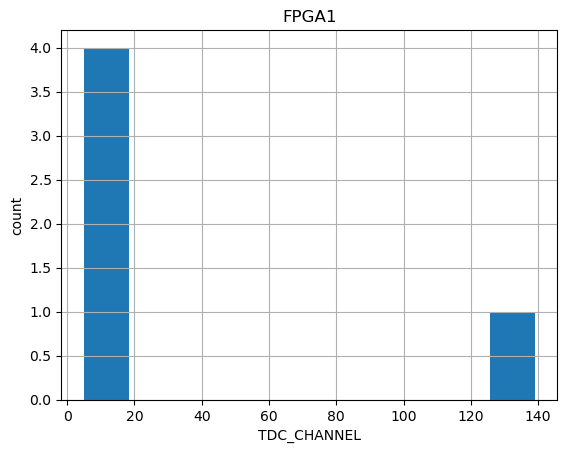

In [245]:
hist0 = fpga0.hist(column = 'TDC_CHANNEL')
plt.title('FPGA0')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('count')
hist1 = fpga1.hist(column = 'TDC_CHANNEL')
plt.title('FPGA1')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('count')
plt.show()